In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../data_cleaned/merged_data.csv')

In [21]:
df

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,...,imdb_id,original_language,popularity,genres,production_companies,production_countries,spoken_languages,film_oscar_nominee,company_nominated,license
0,0,299534,Avengers: Endgame,8.263,23857,Released,2019-04-24,2800000000,181,False,...,tt4154796,en,91.756,Adventure,Marvel Studios,United States of America,"English, Japanese, Xhosa",1.0,0,PG-13
1,1,475557,Joker,8.168,23425,Released,2019-10-01,1074458282,122,False,...,tt7286456,en,54.522,Crime,"Warner Bros. Pictures, Joint Effort, Village R...","Canada, United States of America",English,1.0,1,R
2,2,634649,Spider-Man: No Way Home,7.990,18299,Released,2021-12-15,1921847111,148,False,...,tt10872600,en,186.065,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog",1.0,0,PG-13
3,3,299537,Captain Marvel,6.843,14657,Released,2019-03-06,1131416446,124,False,...,tt4154664,en,50.399,Action,Marvel Studios,United States of America,English,0.0,0,PG-13
4,4,429617,Spider-Man: Far From Home,7.447,14495,Released,2019-06-28,1131927996,129,False,...,tt6320628,en,49.913,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"Czech, Dutch, English, German, Italian",0.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,647,884184,Consecration,5.825,105,Released,2023-02-09,1504289,90,False,...,tt14993352,en,48.774,Horror,"AGC Studios, Bigscope Films, Moonriver Content","United Kingdom, United States of America",English,0.0,0,unknown
637,648,893086,The Good Neighbor,6.952,105,Released,2022-06-17,94909,97,False,...,tt14349032,en,13.842,Thriller,"Forma Pro Films, Altit Media Group","United States of America, Latvia",English,0.0,0,unknown
638,649,639247,Dreamkatcher,5.231,104,Released,2020-06-24,375836,85,False,...,tt10553210,en,7.720,Horror,Taylor Lane Productions,United States of America,English,0.0,0,unknown
639,650,727097,Archenemy,5.306,103,Released,2020-11-30,136240,90,False,...,tt11274100,en,8.290,Action,"SpectreVision, Legion M, RLJ Entertainment, He...",United States of America,English,0.0,0,unknown


## Correlation between numerical columns

In [22]:
df['revenue_M'] = (df['revenue']/1000000).round(2)
df['budget_M'] = (df['budget']/1000000).round(2)

In [23]:
numerical_columns = df.select_dtypes(include=np.number)
columns_to_drop = ['Unnamed: 0', 'id', 'film_oscar_nominee', 'company_nominated', 'revenue', 'budget']
numerical_columns = numerical_columns.drop(columns=columns_to_drop)

In [24]:
numerical_columns

,vote_average,vote_count,runtime,popularity,revenue_M,budget_M
0,8.263,23857,181,91.756,2800.00,356.0
1,8.168,23425,122,54.522,1074.46,55.0
2,7.990,18299,148,186.065,1921.85,200.0
3,6.843,14657,124,50.399,1131.42,152.0
4,7.447,14495,129,49.913,1131.93,160.0
...,...,...,...,...,...,...
636,5.825,105,90,48.774,1.50,0.0
637,6.952,105,97,13.842,0.09,0.0
638,5.231,104,85,7.720,0.38,0.0
639,5.306,103,90,8.290,0.14,0.0


In [25]:
numerical_columns.describe().round(2)

,vote_average,vote_count,runtime,popularity,revenue_M,budget_M
count,641.00,641.00,641.00,641.00,641.00,641.00
mean,6.72,2060.30,110.13,69.34,112.89,41.60
std,0.74,2786.05,19.28,219.48,269.24,64.21
min,4.13,102.00,56.00,1.47,0.00,0.00
25%,6.24,349.00,96.00,13.76,1.27,0.00
50%,6.78,989.00,106.00,22.57,17.40,15.00
75%,7.22,2581.00,119.00,47.71,91.54,50.00
max,8.44,23857.00,209.00,2994.36,2800.00,460.00


In [26]:
df1 = df.groupby(['genres']).agg({'revenue_M':'mean','vote_average':'mean'}).round(2)
df1

,revenue_M,vote_average
genres,,
Action,187.58,6.71
Adventure,668.78,6.98
Animation,223.82,7.49
Comedy,74.84,6.71
Crime,121.73,6.57
Documentary,7.02,7.64
Drama,34.22,6.93
Family,221.75,7.07
Fantasy,203.31,6.39


In [27]:
correlation_matrix = numerical_columns.corr()

In [28]:
correlation_matrix

,vote_average,vote_count,runtime,popularity,revenue_M,budget_M
vote_average,1.000000,0.404338,0.385269,0.177782,0.315516,0.308823
vote_count,0.404338,1.000000,0.413707,0.051276,0.739624,0.633527
runtime,0.385269,0.413707,1.000000,0.141547,0.392091,0.512607
popularity,0.177782,0.051276,0.141547,1.000000,0.201921,0.245316
revenue_M,0.315516,0.739624,0.392091,0.201921,1.000000,0.710240
budget_M,0.308823,0.633527,0.512607,0.245316,0.710240,1.000000


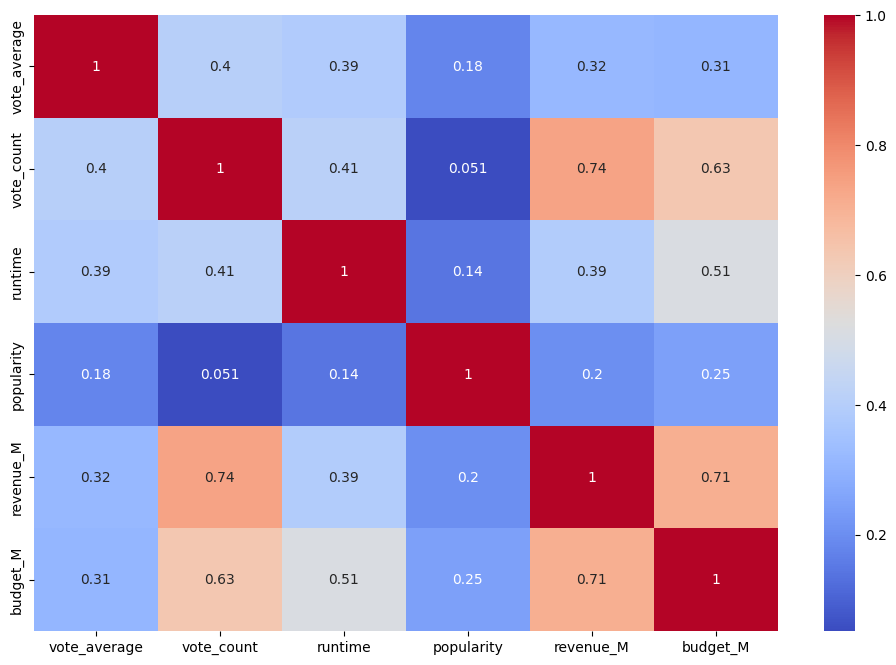

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

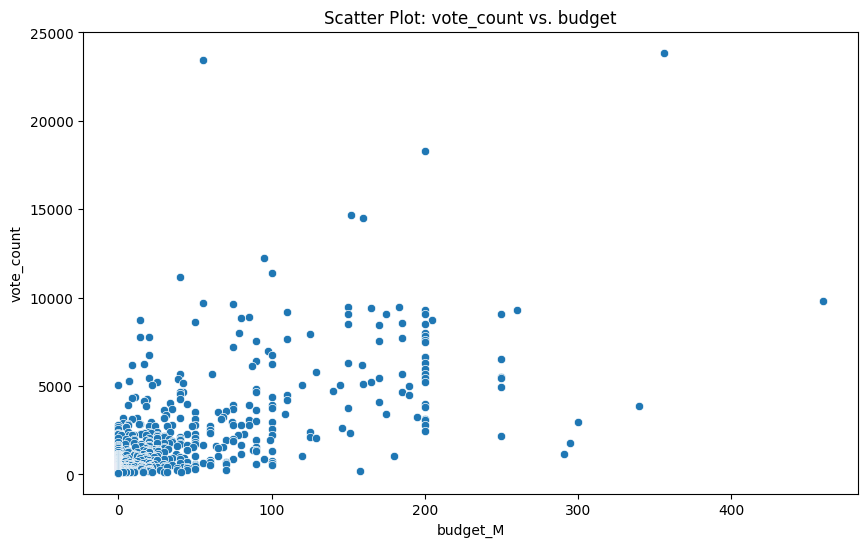

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget_M', y='vote_count', data=numerical_columns)
plt.title('Scatter Plot: vote_count vs. budget')
plt.show()

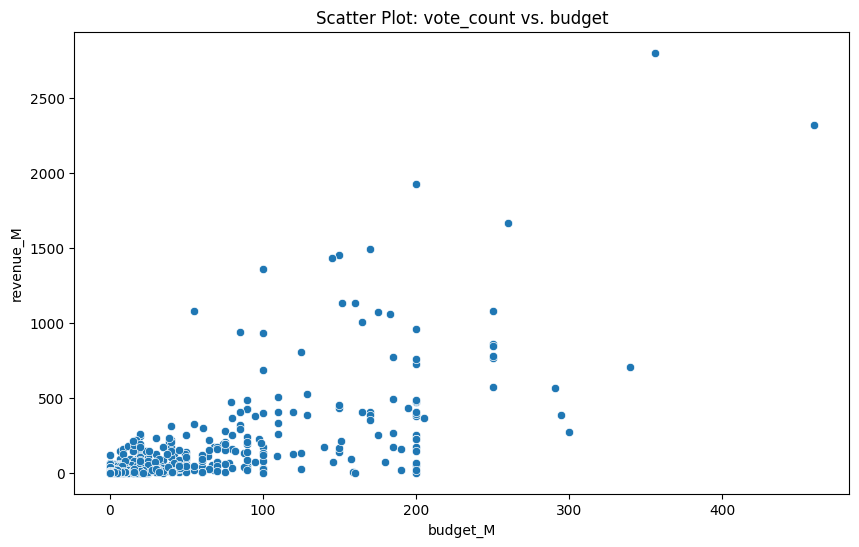

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget_M', y='revenue_M', data=numerical_columns)
plt.title('Scatter Plot: vote_count vs. budget')
plt.show()

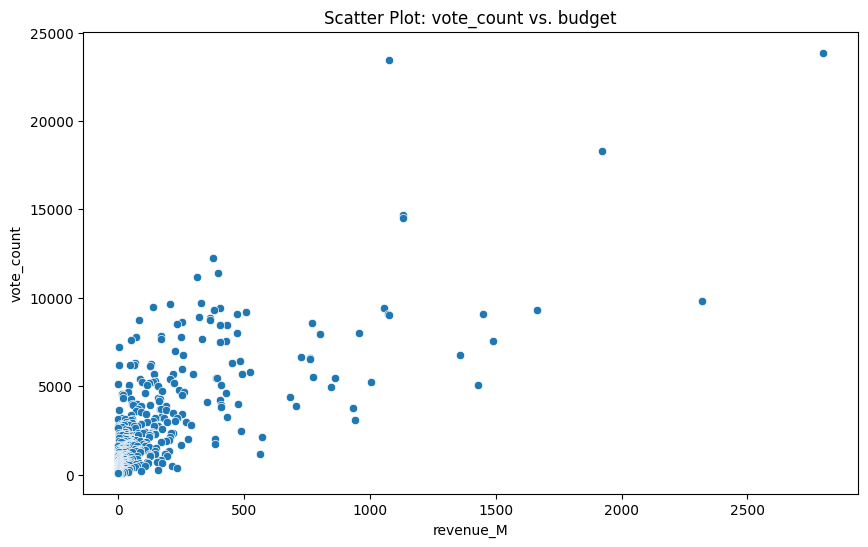

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='vote_count', x='revenue_M', data=numerical_columns)
plt.title('Scatter Plot: vote_count vs. budget')
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['vote_count', 'budget_M', 'revenue_M']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

     Variable       VIF
0  vote_count  2.993886
1    budget_M  2.793599
2   revenue_M  3.091482


In [37]:
#numerical_columns.to_csv('../data_cleaned/questions_1_numerical.csv')

In [38]:
#df.to_csv('../data_cleaned/questions_1_df.csv')